# Testy algorytmu symulowanego wyżarzania

In [7]:
import pandas as pd
from data_structures import Item, Warehouse, Company, Solution
from simulated_annealing import TemperatureFunction, IterationsFunction, SimulatedAnnealing
from visualization_tools import fill_warehouse, print_selected_items, plot_algorithm, \
    plot_temperature_and_iterations, plot_iters_versions, plot_temps_versions

# Dla jakich parametrów będziemy testować algorytm?

* wybór rozwiązania początkowego
* wybór rozwiązania sąsiadującego
* współczynnika ilości wyrzuconych do wszystkich wybranych części
* zmiennego spadku temperatury
* ilości iteracji w poszczególnych epokach

## Testy będą prowadzone dla przypadków o:

* małym rozmiarze   (wybór 4 z 10 rodzajów części, budżet 10 tys.)

In [4]:
small_company = Company(4, 10000, 0.1)
small_warehouse = Warehouse()
fill_warehouse(small_warehouse, 'data/Items-SmallList.csv')

* średnim rozmiarze (wybór 10 z 100 rodzajów części, budżet 50 tys.)

In [5]:
medium_company = Company(10, 50000, 0.1)
medium_warehouse = Warehouse()
fill_warehouse(medium_warehouse, 'data/Items-MediumList.csv')

* dużym rozmiarze   (wybór 50 z 1000 rodzajów części, budżet 100 tys.)

In [ ]:
big_company = Company(50, 100000, 0.1)
big_warehouse = Warehouse()
fill_warehouse(big_warehouse, 'data/Items-BigList.csv')

# Zacznijmy od analizy rozwiązania początkowego:
__Dostępne wersje rozwiązania:__
* __random__ - wybranie rodzaju i liczby części w sposób losowy
* __greatest__ - wybranie rodzaju części z najwyższymi marżami oraz ilości, którą da się kupić za 1/K-tą budżetu
* __uncommon__ - wybranie rodzaju części najrzadziej występujących na rynku oraz ilości, którą da się kupić za 1/K-tą budżetu

### Działanie metody dla małego przypadku

In [4]:
avg_for_small_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_small_case += s1.profit
    
s2 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_small_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      1297.41
WERSJA Z MARŻAMI:   1577.91
WERSJA NAJRZADSZE:  1002.64


### Działanie metody dla średniego przypadku

In [5]:
avg_for_medium_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_medium_case += s1.profit
    
s2 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_medium_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      7738.56
WERSJA Z MARŻAMI:   16368.13
WERSJA NAJRZADSZE:  13059.05


### Działanie metody dla dużego przypadku

In [20]:
avg_for_big_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_big_case += s1.profit
    
s2 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_big_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      19763.82
WERSJA Z MARŻAMI:   39900.38
WERSJA NAJRZADSZE:  22857.87


# Analiza różnych definicji sąsiedztwa:
__Wersje rozwiązania sąsiadującego:__
* __random__ - wyrzucenie i dobór nowych części oraz ich ilości w sposób losowy
* __margins__ - wyrzucenie i dobór nowych części na podstawie najlepszych marży (ilość dobierana w sposób losowy)
* __profit__ - wyrzucenie i dobór nowych części na podstawie największego zysku (ilość dobierana w sposób losowy)

__UWAGA!__ Ponieważ każda z wersji zawiera element losowy testy przeprowadzamy wielokrotnie i wyciągamy z nich średnią

## Algorytm będziemy testować dla poniższych funkcji temperatury i iteracji

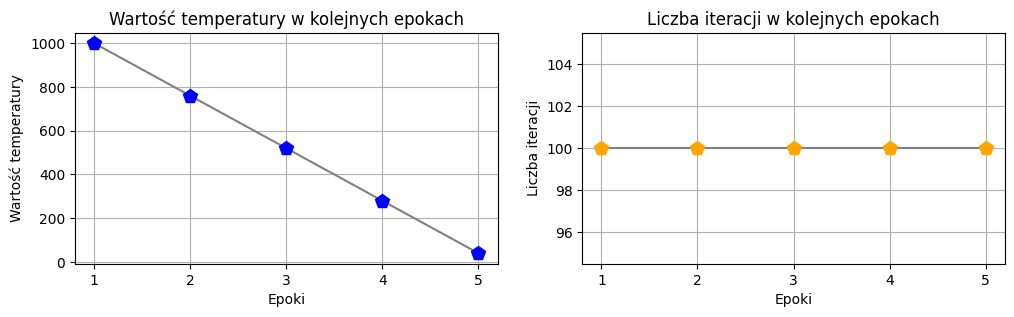

In [13]:
temps = TemperatureFunction(1000, 240, 5, version='arithmetic')
iters = IterationsFunction(100, 100, 5, version='constant')

plot_temperature_and_iterations(temps, iters)

### Działanie metody dla małego przypadku

In [14]:
random_result = SimulatedAnnealing(small_company, small_warehouse.stored_items, temps, iters, adj_version='random')[0]
margins_result = SimulatedAnnealing(small_company, small_warehouse.stored_items, temps, iters, adj_version='margins')[0]
profit_result = SimulatedAnnealing(small_company, small_warehouse.stored_items, temps, iters, adj_version='profit')[0]

print(f'WERSJA LOSOWA:    {random_result[1]:.2f}, osiągnięta w {random_result[0]} iteracji.')
print(f'WERSJA Z MARŻAMI: {margins_result[1]:.2f}, osiągnięta w {margins_result[0]} iteracji.')
print(f'WERSJA Z ZYSKAMI: {profit_result[1]:.2f}, osiągnięta w {profit_result[0]} iteracji.')

WERSJA LOSOWA:    2204.90, osiągnięta w 246 iteracji.
WERSJA Z MARŻAMI: 2008.40, osiągnięta w 3 iteracji.
WERSJA Z ZYSKAMI: 2136.34, osiągnięta w 182 iteracji.


### Działanie metody dla średniego przypadku

In [18]:
random_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='random')[0]
margins_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='margins')[0]
profit_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='profit')[0]

print(f'WERSJA LOSOWA:    {random_result[1]:.2f}, osiągnięta w {random_result[0]} iteracji.')
print(f'WERSJA Z MARŻAMI: {margins_result[1]:.2f}, osiągnięta w {margins_result[0]} iteracji.')
print(f'WERSJA Z ZYSKAMI: {profit_result[1]:.2f}, osiągnięta w {profit_result[0]} iteracji.')

WERSJA LOSOWA:    20213.63, osiągnięta w 393 iteracji.
WERSJA Z MARŻAMI: 19471.17, osiągnięta w 1 iteracji.
WERSJA Z ZYSKAMI: 19857.71, osiągnięta w 297 iteracji.


### Działanie metody dla dużego przypadku

In [19]:
random_result = SimulatedAnnealing(big_company, big_warehouse.stored_items, temps, iters, adj_version='random')[0]
margins_result = SimulatedAnnealing(big_company, big_warehouse.stored_items, temps, iters, adj_version='margins')[0]
profit_result = SimulatedAnnealing(big_company, big_warehouse.stored_items, temps, iters, adj_version='profit')[0]

print(f'WERSJA LOSOWA:    {random_result[1]:.2f}, osiągnięta w {random_result[0]} iteracji.')
print(f'WERSJA Z MARŻAMI: {margins_result[1]:.2f}, osiągnięta w {margins_result[0]} iteracji.')
print(f'WERSJA Z ZYSKAMI: {profit_result[1]:.2f}, osiągnięta w {profit_result[0]} iteracji.')

WERSJA LOSOWA:    36734.82, osiągnięta w 339 iteracji.
WERSJA Z MARŻAMI: 40351.10, osiągnięta w 2 iteracji.
WERSJA Z ZYSKAMI: 40908.60, osiągnięta w 104 iteracji.


# Wpływ współczynnika wyrzucanych elementów

Zgodnie z naszą definicją sąsiedztwa sąsiednie rozwiązania zawierają pewien ułamek __wspólnych__ części samochodowych w __tych samych__ ilościach. 
Ten ułamek jest determinowany przez parametr __drop_coeff__.

Testy będą przeprowadzane dla:
* losowej wersji sąsiedztwa (__random__),
* w przypadku średniej wielkości,
* poprzednich wersji temperatury i iteracji

i sprawdzą, czy współczynnik ma wpływ na szybsze dochodzenie do rozwiązania najlepszego.

### Współczynnik drop_coeff = 0.1

In [14]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, 
                                     adj_version='random', drop_coeff=0.1)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.1 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.1 daje średni rezultat: 18672.26, osiągnięty w ok. 284 iteracji.


### Współczynnik drop_coeff = 0.3

In [21]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, 
                                     adj_version='random', drop_coeff=0.3)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.3 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.3 daje średni rezultat: 19672.02, osiągnięty w ok. 255 iteracji.


### Współczynnik drop_coeff = 0.5

In [16]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, 
                                     adj_version='random', drop_coeff=0.5)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.5 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.5 daje średni rezultat: 19953.66, osiągnięty w ok. 267 iteracji.


### Współczynnik drop_coeff = 0.7

In [20]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, 
                                     adj_version='random', drop_coeff=0.7)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.7 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.7 daje średni rezultat: 20014.53, osiągnięty w ok. 307 iteracji.


# Różnice w spadkach temperatury

Zobaczmy zachowanie algorytmu dla różnej dynamiki obniżania się temperatury

In [9]:
const_iters = IterationsFunction(75, 75, 6, version='constant')

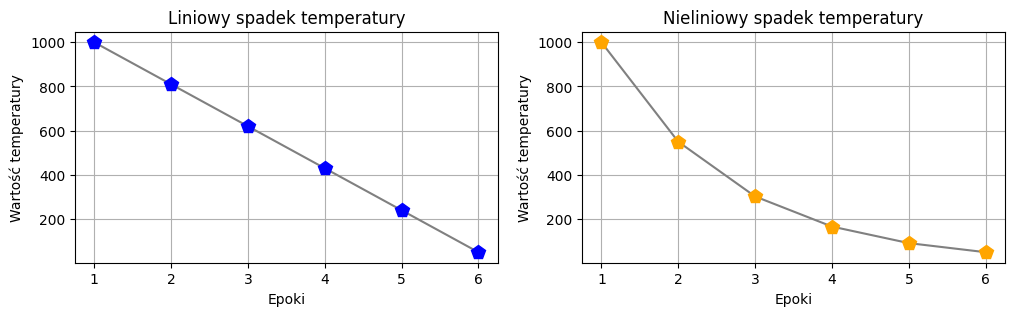

In [10]:
arith_temps = TemperatureFunction(1000, 190, 6, version='arithmetic')
geom_temps = TemperatureFunction(1000, 0.55, 6, version='geometric')

plot_temps_versions(arith_temps, geom_temps)

### Liniowy spadek temperatury

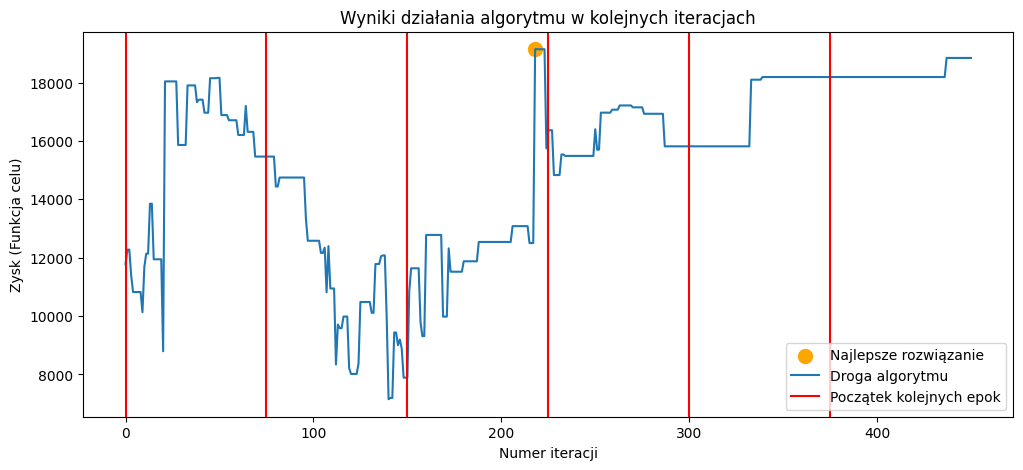

(218, 19147.87527744443)


In [11]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, 
                                                                 arith_temps, const_iters)
plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

### Nieliniowy spadek temperatury

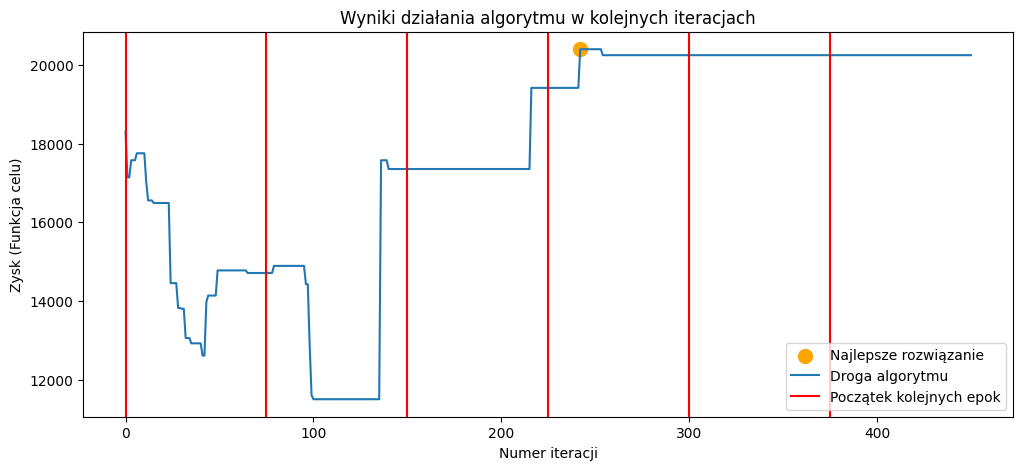

(242, 20391.03393464059)


In [24]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, 
                                                                 geom_temps, const_iters)
plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

# Czas na zmienną funkcję iteracji

Sprawdźmy, czy wzrost iteracji wraz z wzrostem epok poprawi działanie algorytmu 

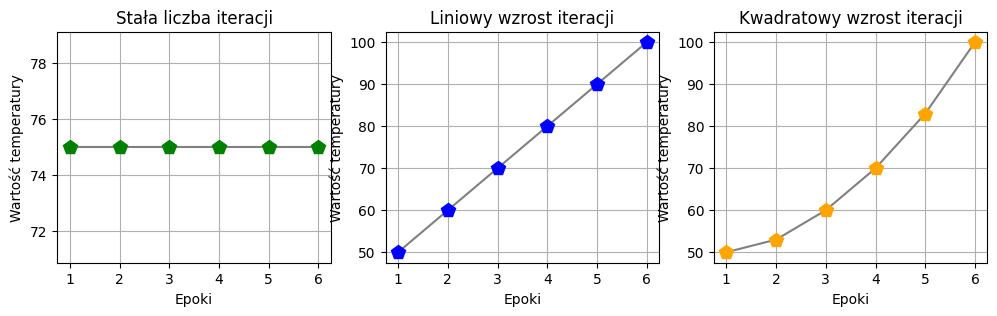

In [25]:
const_iters = IterationsFunction(75, 75, 6, version='constant')
linear_iters = IterationsFunction(50, 100, 6, version='linear')
square_iters = IterationsFunction(50, 100, 6, version='square')

plot_iters_versions(const_iters, linear_iters, square_iters)

### Stała liczba iteracji

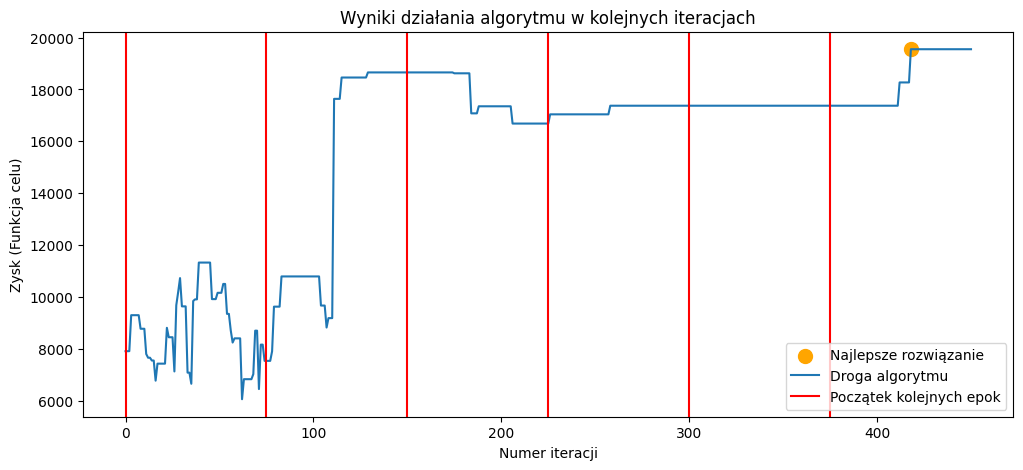

(418, 19550.77116844912)


In [26]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, 
                                                                 geom_temps, const_iters)
plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

### Liniowy wzrost liczby iteracji

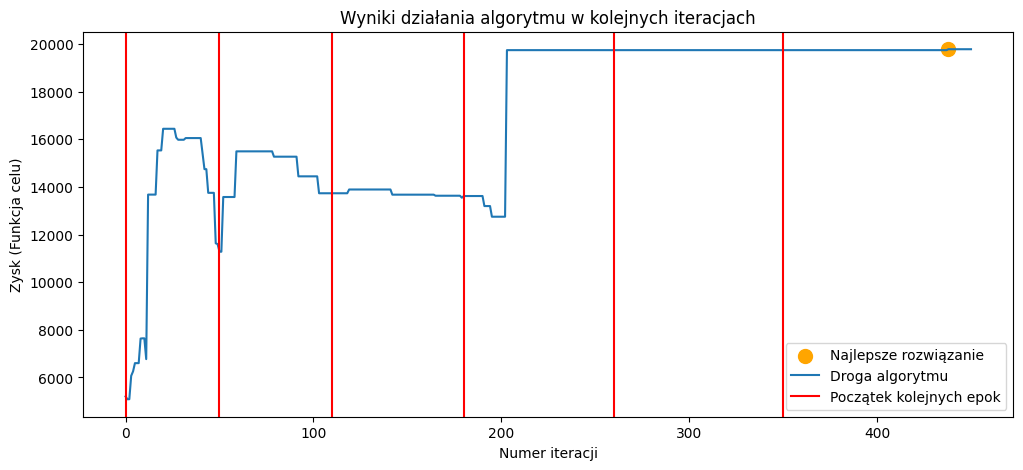

(438, 19783.578806460526)


In [27]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, 
                                                                 geom_temps, linear_iters)
plot_algorithm(way_of_algorithm, best_result, linear_iters)
print(best_result)

### Kwadratowy wzrost liczby iteracji

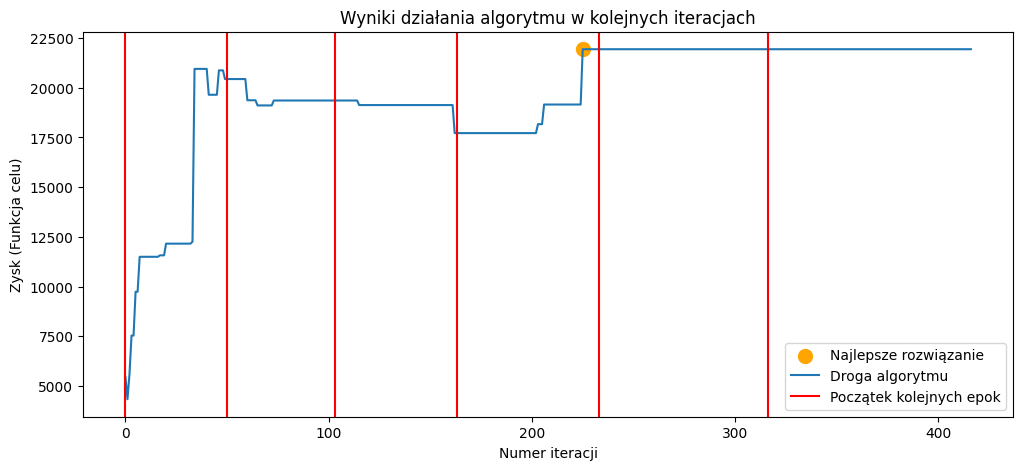

(225, 21938.38887640662)


In [28]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, 
                                                                 geom_temps, square_iters)
plot_algorithm(way_of_algorithm, best_result, square_iters)
print(best_result)

# Złożoności czasowe

Gdy mamy już wybrane najlepsze wersje algorytmu zobaczmy na złożoności czasowe

### Mały przypadek

In [17]:
%%timeit range(10)
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(small_company, small_warehouse.stored_items, 
                                                                 geom_temps, square_iters)

87.9 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Średni przypadek

In [18]:
%%timeit range(10)
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, 
                                                                 geom_temps, square_iters)

1.49 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Duży przypadek

In [20]:
%%timeit range(10)
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(big_company, big_warehouse.stored_items, 
                                                                 geom_temps, square_iters)

50.9 s ± 3.72 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Wnioski:

* Wersja rozwiązania początkowego z sortowaniem po marżach daje najlepsze rezultaty

* Dane do małego magazynu były generowane ręcznie, w przeciwieństwie do losowej generacji danych w większych przypadkach, co ma wpływ na wyniki

* Wersja rozwiązania sąsiadującego wykorzystująca marże jest zbyt deterministyczna i dąży do określonego rozwiązania już w kilku pierwszych iteracjach, choć w cale nie daje rezultatów zbliżonych do optymalnego

* Najlepsza wersja rozwiązania sąsiadującego to ta sortująca elementy po generowanym zysku

* Różne współczynniki wyrzucanych elementów dają podobne wartości funkcji celu, natomiast najszybciej zbieżny jest ten w granicach ok. 0.3

# Wnioski cd.

* Poprawne dobranie temperatury uwzględniające rząd wielkości delty oraz to by końcowa temperatura była bliska zeru jest kluczowa dla poprawnego działania algorytmu

* Dynamiką spadku temperatury możemy sterować dynamiką przyjmowania gorszych rozwiązań

* Wzrost liczby iteracji w kolejnych epokach poprawia zdolność algorytmu do znalezienia lepszego rozwiązania

* Złożoność czasowa algorytmu jest spora, lecz gdyby zoptymalizować kod (przenieść informację o marży z klasy __Item__ do __Solution__ to mogłoby skrócić czas do akceptowalnej wartości